In [20]:
import pandas as pd
import numpy as np
import keybert
import re
import nltk
from keybert import KeyBERT
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from tqdm import tqdm

from keyphrase_vectorizers import KeyphraseCountVectorizer

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keyanguo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/keyanguo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('topic_model.csv')

In [3]:
df

,documents,label
0,My 9 year old son has been playing roblox rece...,0
1,My son is not a terrorist and the creator of t...,0
2,I was absoloutly disguasted seeing a naked per...,0
3,never let your kids play this game!\n,7
4,"Someone called my son a ""Bacon Newb"" or someth...",0
...,...,...
19350,Another problem is diffuculty.\n,2
19351,The building aspect can be extremely hard.\n,3
19352,"Cons: The Builder's Club is a little pricey, t...",3
19353,(Sorry for not making new reviews for a few da...,4


In [6]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

In [7]:
def keybert_extract(text):
    text = str(text)
    try:
        results = kw_model.extract_keywords(docs=text, vectorizer=KeyphraseCountVectorizer(),top_n=10, stop_words='english')
        words = []
        for result in results:
            words.append(result[0])
    except:
        words = []
    return words

In [8]:
tqdm.pandas()
df['keybert'] = df['documents'].progress_apply(keybert_extract)

  0%|          | 0/19355 [00:00<?, ?it/s]

100%|██████████| 19355/19355 [2:48:12<00:00,  1.92it/s]     


In [9]:
df

,documents,label,keybert
0,My 9 year old son has been playing roblox rece...,0,"[roblox, children, parents, game, old son, abs..."
1,My son is not a terrorist and the creator of t...,0,"[terrorist, badimo, young children, slurs, son..."
2,I was absoloutly disguasted seeing a naked per...,0,"[kids game, kids, naked person, normal thing, ..."
3,never let your kids play this game!\n,7,"[kids, game]"
4,"Someone called my son a ""Bacon Newb"" or someth...",0,"[bacon newb, son, something, someone]"
...,...,...,...
19350,Another problem is diffuculty.\n,2,"[diffuculty, problem]"
19351,The building aspect can be extremely hard.\n,3,[building aspect]
19352,"Cons: The Builder's Club is a little pricey, t...",3,"[cons, builder, avatars, club, odd looking, ga..."
19353,(Sorry for not making new reviews for a few da...,4,"[roblox, new reviews, few days]"


In [30]:
# append keybert results with labels
labels = {}
for uniq_label in df['label'].unique():
    keywords = []
    for index, row in df[df['label']==uniq_label].iterrows():
        keywords.extend(row['keybert'])
    labels[uniq_label] = keywords

In [34]:
# remove common keywrods such as 'covid', '19', 'coronavirus'
for key, value in labels.items():
    labels[key] = [x for x in value if x not in ['roblox', 'game', 'games', 'robux', 'children', 'parents', 'accounts', 'people', 'kid', 'son', 'girl',
                                                 'kids', 'person']]


In [72]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.add('play')
stopwords.add('player')
stopwords.add('thing')
stopwords.add('game')
stopwords.add('roblox')
stopwords.add('roblux')
stopwords.add('robux')
stopwords.add('games')
stopwords.add('people')
stopwords.add('kid')
stopwords.add('child')
stopwords.add('parent')
stopwords.add('account')
stopwords.add('age')
stopwords.add('son')
stopwords.add('old')
stopwords.add('year')
stopwords.add('daughter')

lemmatizer = WordNetLemmatizer()
def word_cloud(corpus):
    comment_words = '' 

    for val in corpus:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            # convert each token into lowercase
            tokens[i] = tokens[i].lower()
            # remove signs
            tokens[i] = re.sub(r'[^\w\s]', '', tokens[i])
            # remove single characters
            tokens[i] = re.sub(r'\s+[a-zA-Z]\s+', '', tokens[i])
            # stem the words
            tokens[i] = lemmatizer.lemmatize(tokens[i])

            # remove if the token is a stopword
            if not tokens[i] in stopwords:
                comment_words += tokens[i]+" "            
        # comment_words += " ".join(tokens)+" "
    return comment_words

def draw_word_cloud(comment_words):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

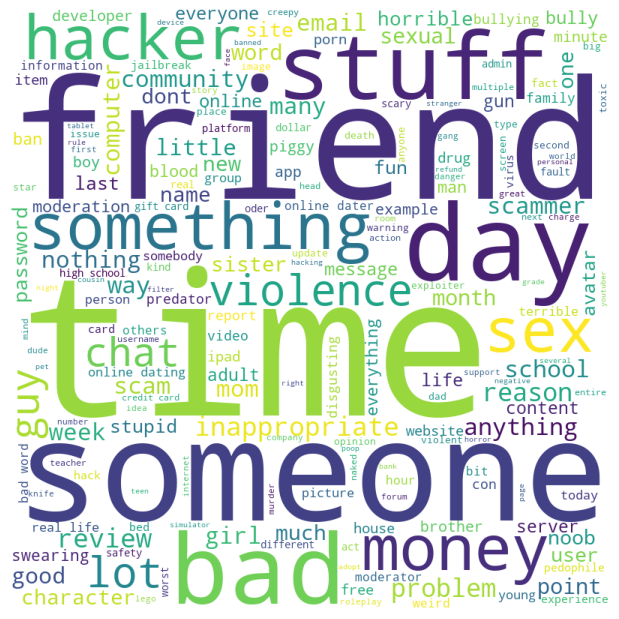

In [73]:
cloud_0 = word_cloud(labels[0])
draw_word_cloud(cloud_0)

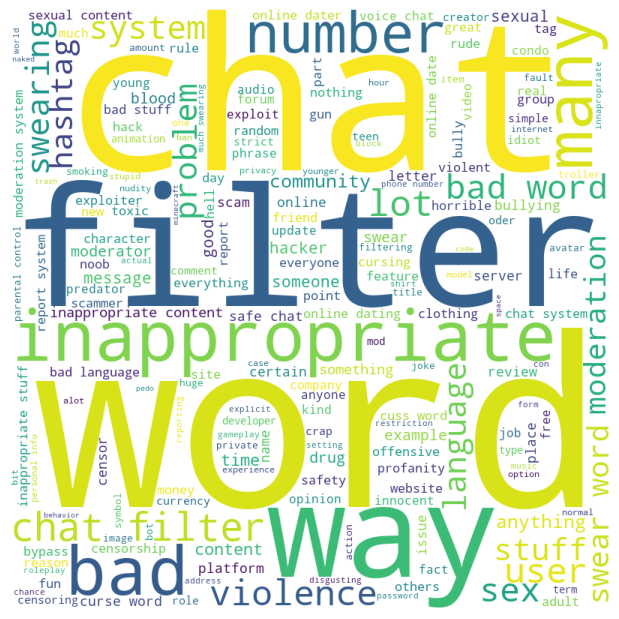

In [74]:
cloud_1 = word_cloud(labels[1])
draw_word_cloud(cloud_1)

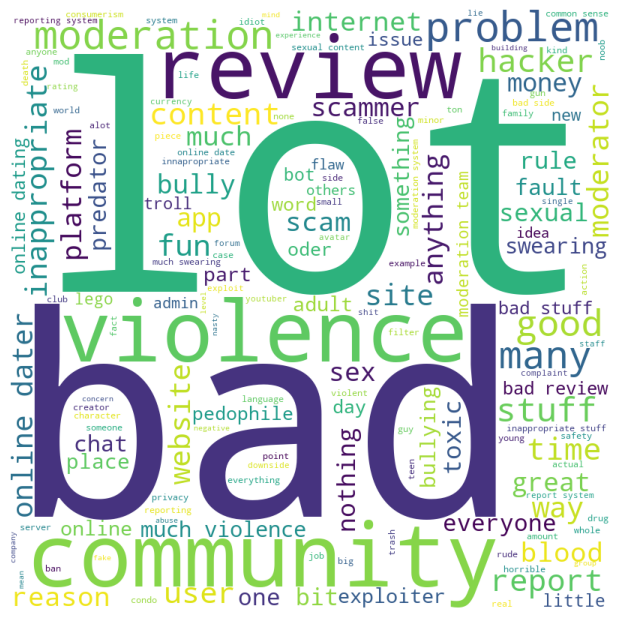

In [75]:
cloud_2 = word_cloud(labels[2])
draw_word_cloud(cloud_2)

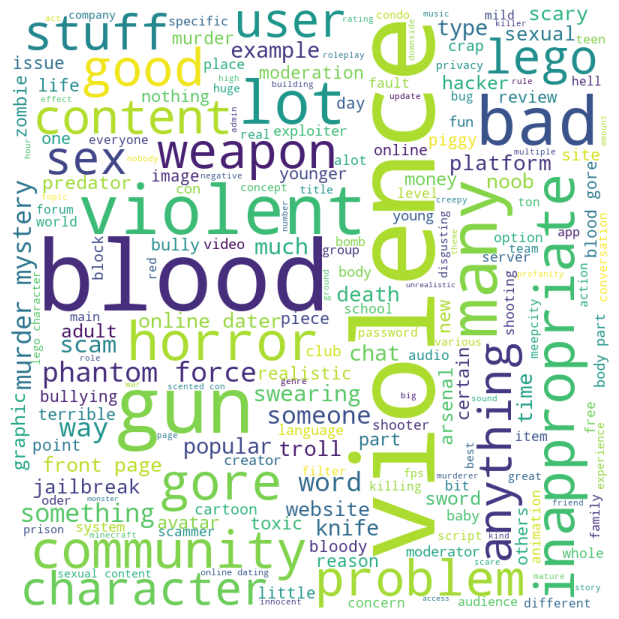

In [76]:
cloud_3 = word_cloud(labels[3])
draw_word_cloud(cloud_3)

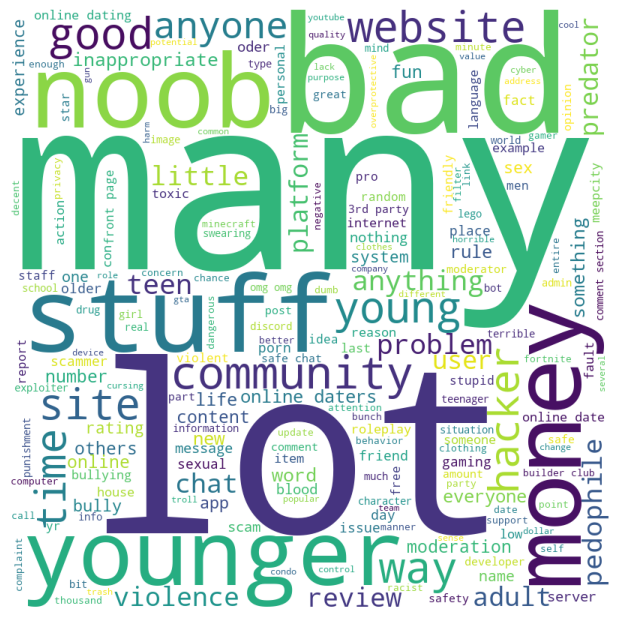

In [77]:
cloud_4 = word_cloud(labels[4])
draw_word_cloud(cloud_4)

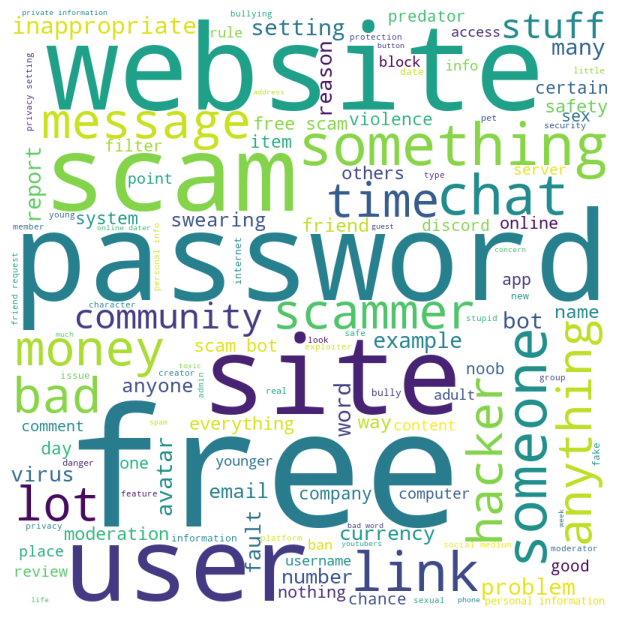

In [78]:
cloud_5 = word_cloud(labels[5])
draw_word_cloud(cloud_5)

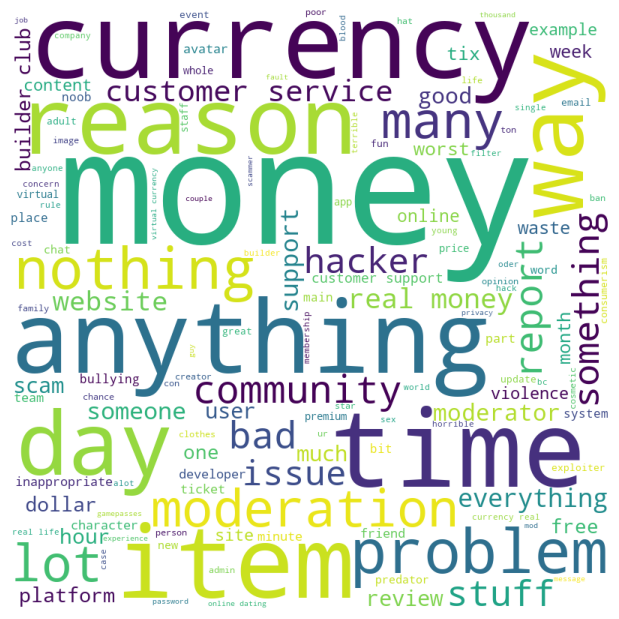

In [79]:
cloud_6 = word_cloud(labels[6])
draw_word_cloud(cloud_6)

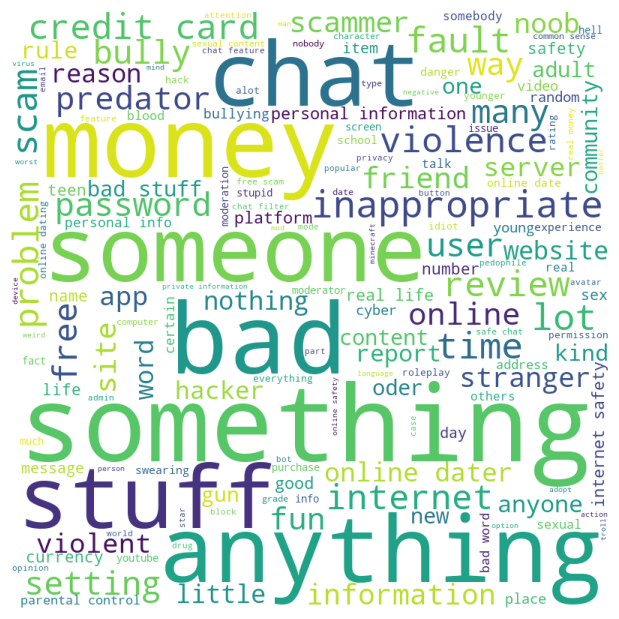

In [80]:
cloud_7 = word_cloud(labels[7])
draw_word_cloud(cloud_7)

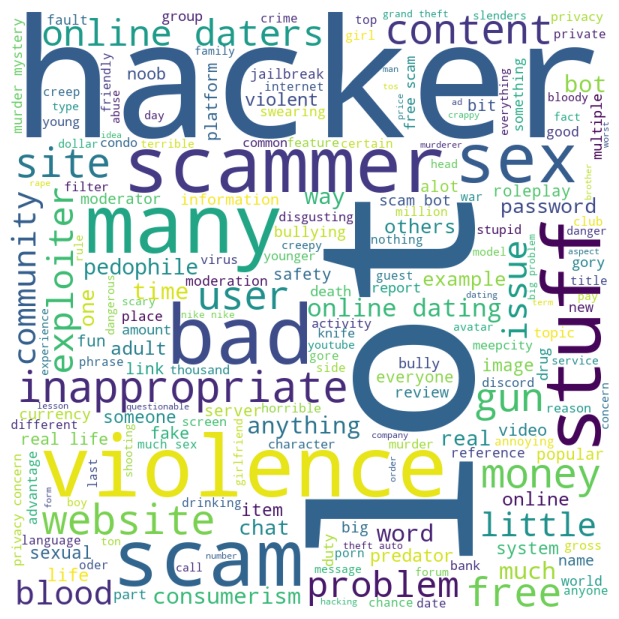

In [81]:
cloud_8 = word_cloud(labels[8])
draw_word_cloud(cloud_8)

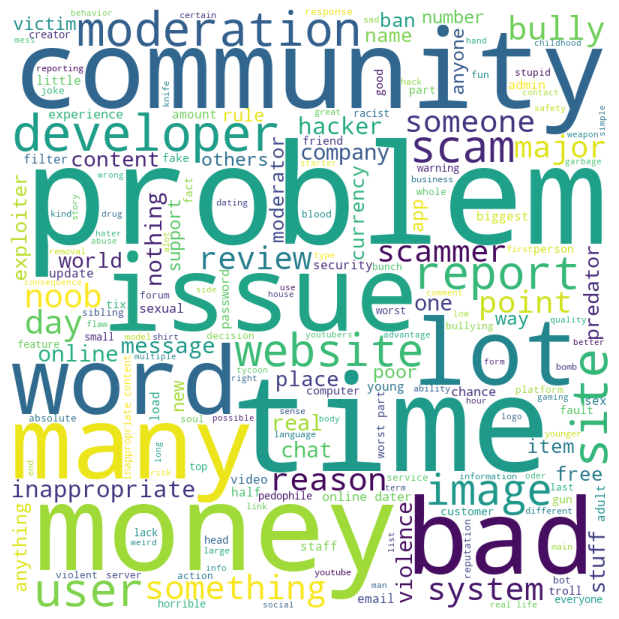

In [82]:
cloud_9 = word_cloud(labels[9])
draw_word_cloud(cloud_9)